In [1]:
from sklearn import datasets
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score


In [2]:
df = datasets.load_iris(as_frame=True)
x=df.data
y=df.target
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data=pd.DataFrame()
data['sepal_area']=(x['sepal length (cm)']*x['sepal width (cm)'])
data['petal_area']=(x['petal length (cm)']*x['petal width (cm)'])
data

,sepal_area,petal_area
0,17.85,0.28
1,14.70,0.28
2,15.04,0.26
3,14.26,0.30
4,18.00,0.28
...,...,...
145,20.10,11.96
146,15.75,9.50
147,19.50,10.40
148,21.08,12.42


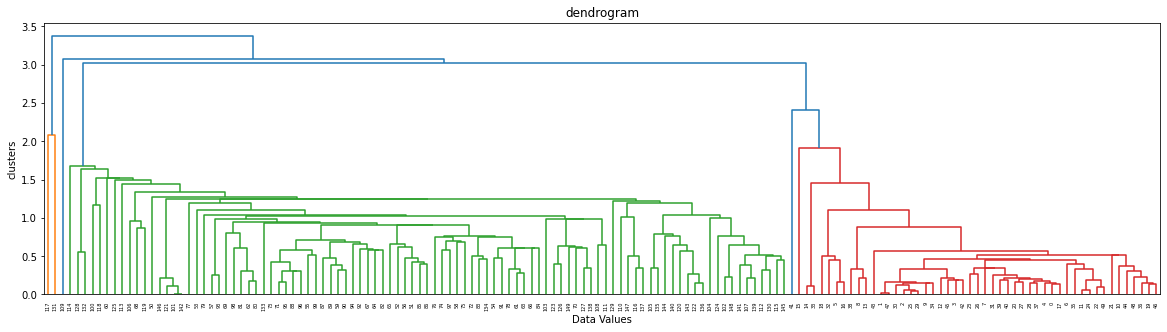

In [4]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20, 5))
dendrogram = sch.dendrogram(sch.linkage(data,"single"))
plt.title('dendrogram')
plt.xlabel('Data Values')
plt.ylabel('clusters')
plt.show()

3 clusters it is 

In [5]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='single')
cluster.fit_predict(data)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
Agglomerative_sil_score = silhouette_score(data, cluster.labels_)
Agglomerative_sil_score 

0.3892039574334441

In [7]:
from sklearn_extra.cluster import KMedoids
kmedoids=KMedoids(n_clusters=3, metric='manhattan', method='alternate', init='heuristic', random_state=None)
kmedoids.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

In [8]:
Kmedoids_sil_score = silhouette_score(data, kmedoids.labels_)
Kmedoids_sil_score

0.4453849956655975

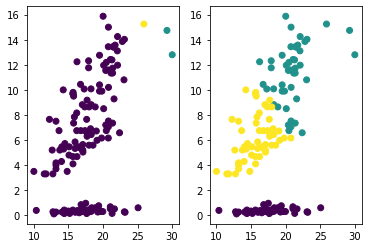

In [13]:
fig,axs=plt.subplots(1,2)
axs[0].scatter(x=data.iloc[:,0], y=data.iloc[:,1], c=cluster.labels_)
axs[1].scatter(x=data.iloc[:,0], y=data.iloc[:,1], c=kmedoids.labels_)

